In [1]:
import sys
sys.path.append('../src')

from time_series import (
    load_data,
    generate_lags,
    generate_lagged_df,
    split_df,
    fit_model,
    predict_evaluate_model,
    plot_forecast_vs_actual,
    plot_train_test_predictions,
)


In [2]:
df = load_data('../data/data_original_m6.csv')
df.head(3)

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-01,125.672005,341.526031,81.144257,144.980698,116.244766,135.845093,295.972290,151.193497,225.756577,198.813828,...,73.001434,62.652004,37.921776,98.328560,159.164963,71.541222,63.674873,126.980408,182.482285,73.886658
2022-02-02,127.158058,347.372375,82.549454,146.648575,116.419128,137.952209,300.881073,150.612503,232.359009,193.332672,...,74.459702,62.853901,38.180336,99.012138,160.458786,72.398964,64.616043,128.688538,181.393707,73.694695
2022-02-03,129.093597,333.920837,82.834190,145.507904,112.476517,133.787003,292.273804,138.845505,231.047760,186.040558,...,69.478104,62.257393,37.758987,97.433182,155.803101,72.417839,64.327171,128.138443,175.842789,72.835434


In [3]:
# Load dataset
y = df['ABBV']

n_lags_future = 2
lags_past, lags_future, lags_ar, lags_arp = generate_lags(n_lags_past=2*n_lags_future,
                                                          n_lags_future=n_lags_future
                                                          )
print(lags_past)
print(lags_future)
print(lags_ar)
print(lags_arp)


['y-4', 'y-3', 'y-2', 'y-1']
['y+1', 'y+2']
['y-4', 'y-3', 'y-2', 'y-1']
['y-2', 'y-1', 'y+1', 'y+2']


In [4]:
df_lagged = generate_lagged_df(
    series=y,
    n_lags_past=2*n_lags_future,
    n_lags_future=n_lags_future,
)

display(df_lagged)

,y-4,y-3,y-2,y-1,y,y+1,y+2
Date,,,,,,,
2022-02-07,125.672005,127.158058,129.093597,129.020187,130.744751,131.643707,131.359375
2022-02-08,127.158058,129.093597,129.020187,130.744751,131.643707,131.359375,130.909882
2022-02-09,129.093597,129.020187,130.744751,131.643707,131.359375,130.909882,130.267746
2022-02-10,129.020187,130.744751,131.643707,131.359375,130.909882,130.267746,131.175903
2022-02-11,130.744751,131.643707,131.359375,130.909882,130.267746,131.175903,132.790359
...,...,...,...,...,...,...,...
2023-02-16,144.786819,146.386581,145.301041,143.844116,142.387222,144.082184,144.739227
2023-02-17,146.386581,145.301041,143.844116,142.387222,144.082184,144.739227,143.472748
2023-02-21,145.301041,143.844116,142.387222,144.082184,144.739227,143.472748,144.805893


In [5]:
df_train, df_test = split_df(df_lagged, train_test_ratio=0.8)
display(df_train)
display(df_test.head())


,y-4,y-3,y-2,y-1,y,y+1,y+2
Date,,,,,,,
2022-02-07,125.672005,127.158058,129.093597,129.020187,130.744751,131.643707,131.359375
2022-02-08,127.158058,129.093597,129.020187,130.744751,131.643707,131.359375,130.909882
2022-02-09,129.093597,129.020187,130.744751,131.643707,131.359375,130.909882,130.267746
2022-02-10,129.020187,130.744751,131.643707,131.359375,130.909882,130.267746,131.175903
2022-02-11,130.744751,131.643707,131.359375,130.909882,130.267746,131.175903,132.790359
...,...,...,...,...,...,...,...
2022-11-30,150.347000,150.563950,149.441467,149.224533,152.035461,152.459930,154.374756
2022-12-01,150.563950,149.441467,149.224533,152.035461,152.459930,154.374756,154.638870
2022-12-02,149.441467,149.224533,152.035461,152.459930,154.374756,154.638870,154.431320


,y-4,y-3,y-2,y-1,y,y+1,y+2
Date,,,,,,,
2022-12-07,152.459930,154.374756,154.638870,154.431320,156.016022,156.572556,153.808792
2022-12-08,154.374756,154.638870,154.431320,156.016022,156.572556,153.808792,155.940582
2022-12-09,154.638870,154.431320,156.016022,156.572556,153.808792,155.940582,155.440628
2022-12-12,154.431320,156.016022,156.572556,153.808792,155.940582,155.440628,155.506668
2022-12-13,156.016022,156.572556,153.808792,155.940582,155.440628,155.506668,153.846527


In [6]:
from sklearn.linear_model import LinearRegression

model = fit_model(df_train,
                  features=lags_arp,
                  model_class=LinearRegression,
                  )


In [7]:
# Predict and evaluate on Training set
y_pred_train, mape_train = predict_evaluate_model(model,
                                      df_train,
                                      features=lags_arp
                                      )

display(y_pred_train.head())
print(f"MAPE: {mape_train:.4f}")


c:\Users\andre\Desktop\Tese Out 2025\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Date
2022-02-07    130.377704
2022-02-08    131.198990
2022-02-09    131.387816
2022-02-10    130.781770
2022-02-11    130.965113
Name: y_pred, dtype: float64

MAPE: 0.0079


In [8]:
# Predict and evaluate on Testing set
y_pred_test, mape_test = predict_evaluate_model(model,
                                      df_test,
                                      features=lags_arp
                                      )

display(y_pred_test.head())
print(f"MAPE: {mape_test:.4f}")


c:\Users\andre\Desktop\Tese Out 2025\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Date
2022-12-07    155.566511
2022-12-08    154.817637
2022-12-09    156.239369
2022-12-12    154.407526
2022-12-13    155.853912
Name: y_pred, dtype: float64

MAPE: 0.0061


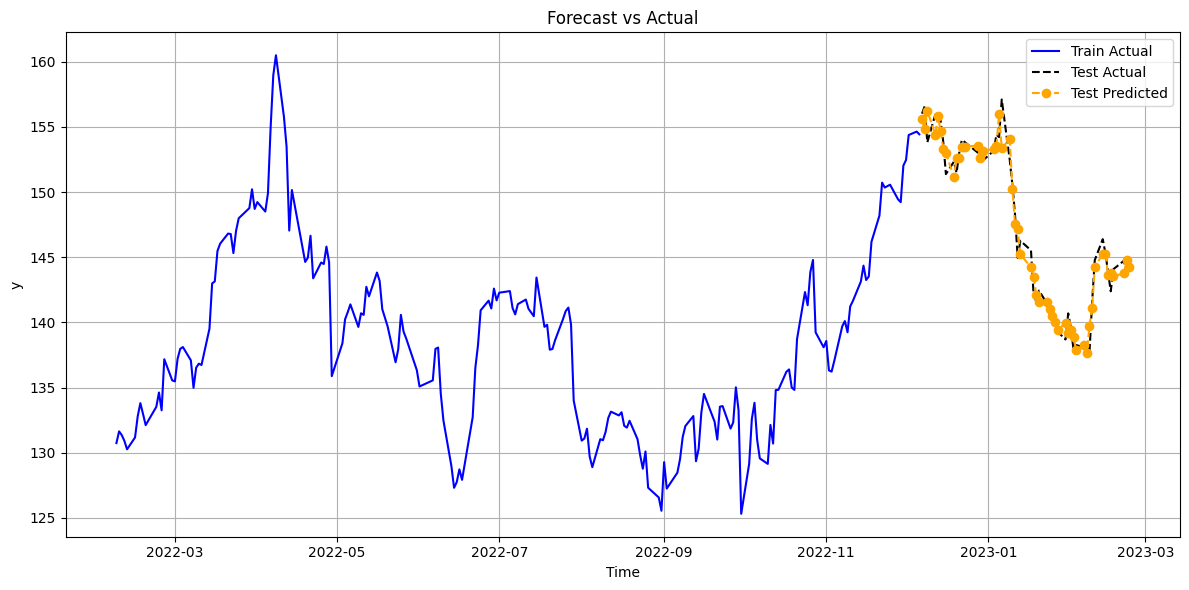

In [9]:
# After fitting and predicting:
plot_forecast_vs_actual(df_train, df_test, y_pred_test)


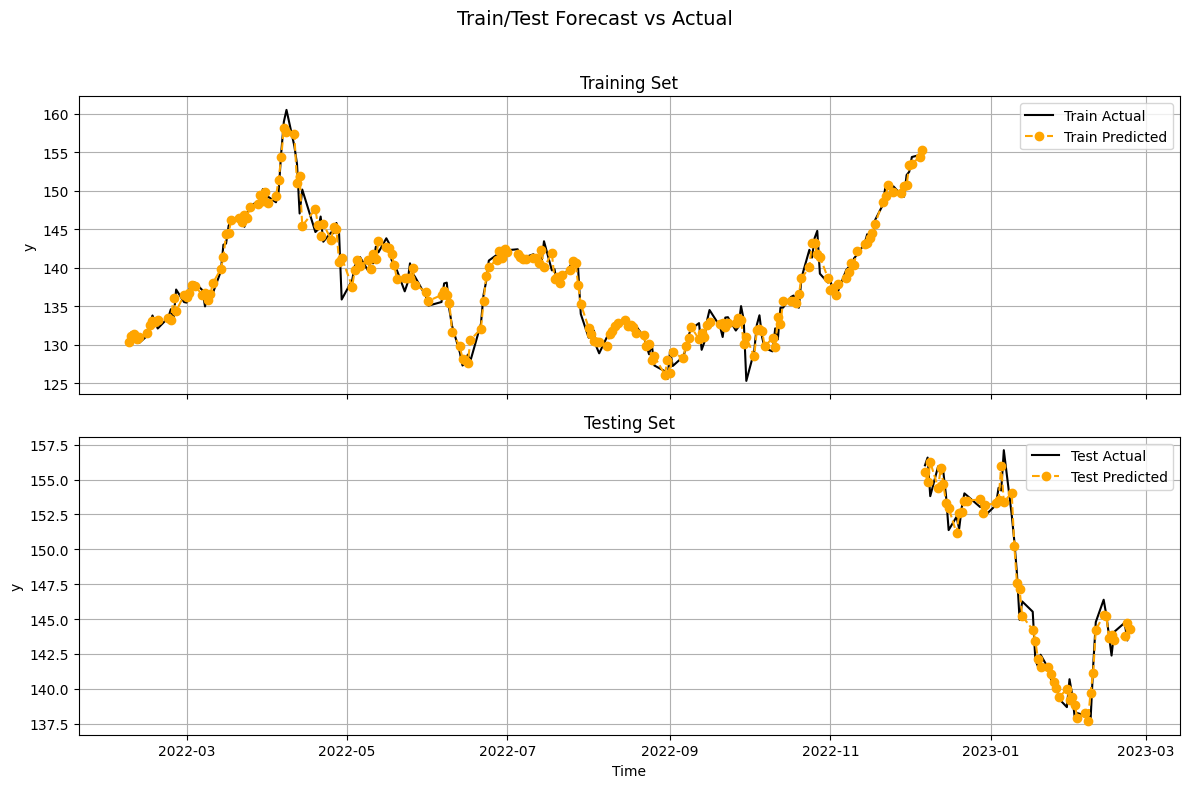

In [10]:
# Plot results
plot_train_test_predictions(df_train, df_test, y_pred_train, y_pred_test)
